In [1]:
from optimize import *
import time
cmap = plt.get_cmap('viridis')

In [2]:
configuraciones = ['--cr un --mu bf --a ur --rep rm --pop 200 --dec 50 --prob_cr 0.5 --prob_mu 0.25 --prob_ini 0.1',
                    '--cr un --mu bf --a ur --rep rm --pop 200 --dec 50 --prob_cr 0.75 --prob_mu 0.5 --prob_ini 0.25',
                    '--cr hun --mu bfo --a ur --rep rm --pop 200 --dec 50 --prob_cr 0.5 --prob_mu 0.5 --prob_ini 0.25',
                    '--cr un --mu bf --a ur --rep rm --pop 200 --dec 50 --prob_cr 0.5 --prob_mu 0.5 --prob_ini 0.1',
                    '--cr un --mu bfo --a ur --rep rm --pop 200 --dec 50 --prob_cr 0.5 --prob_mu 0.5 --prob_ini 0.1']

In [3]:
instance_id = '7'
instance = '../GeoData/Instances/Instance_' + instance_id + '.pkl'

output = 'Results/testPerformance'+instance_id
testPerformance = dict([i, {'hv':[], 'res':[], 'time':[]}] for i in range(len(configuraciones)))
plot_performance = False
plot_time = True

## Celda para ejecutar el análisis desde cero
En esta celda se realizan las 20 ejecuciones de cada configuración para la instancia establecida arriba

In [4]:
if False:
    for i,p in enumerate(configuraciones):
        
        for ejec in range(20):
            seed = str(ejec*308)
            
            # Extra whitespace around options is important!
            parameters = ' -i ' + instance + ' --seed ' + seed + ' ' + p

            ini = time.time()
            hv, res = exec_algorithm(parameters, returnData=True, timeout=10)
            fin = time.time()
            
            testPerformance[i]['hv'].append(hv)
            testPerformance[i]['res'].append(res)
            testPerformance[i]['time'].append(fin - ini)
            
            finish = ['ok','fail'][res == -1]
            
            linea = str(i) + ' ' + str(ejec) + ' ' + str(hv) + ' ' + str(fin - ini) + ' ' + finish + '\n'
            with open(output + '.txt', 'a') as file:
                file.write(linea)
                
            with open(output+'.pkl', 'wb') as f:  
                pickle.dump(testPerformance, f)
                f.close()
            
            print(linea)

## Celda para cargar el análisis previo
PAra no volver a ejecutar desde cero el análisis, se carga la información del archivo pickle.

In [7]:
with open('Results/testPerformance' + instance_id+ '.pkl', 'rb') as f:
    testPerformance = pickle.load(f) 
    f.close()

### Cargar datos de irace
En caso de ser de utilidad

In [5]:
irace = pd.read_csv('../ajuste/export/export.csv')
irace.pop('Unnamed: 0')

ejecs = irace[irace['instancename'] == 'Instance_' + instance_id]
ejecs = ejecs[ejecs['type']=='regular']
ejecs = ejecs[ejecs['value'] <= 0.99]

In [6]:
otras_conf = ejecs['value'].to_list()
otras_conf_color = ejecs['id'].to_list()
bkv = ejecs['bkv'].to_list()[0]

## Graficar el desempeño por instancia

In [8]:
if plot_performance:
    fig, ax = plt.subplots(figsize=(3, 8))

    # Coordenadas x para las barras
    ind = len(testPerformance)

    # Ancho de las barras
    ancho_barra = 0.5

    hipervolumenes = [testPerformance[i]['hv'] for i in range(ind)]

    tiempos = [np.mean(testPerformance[i]['time']) for i in range(ind)]

    ax.boxplot(hipervolumenes,widths=ancho_barra, showfliers=True, zorder = 3, 
            medianprops=dict(color=(1,0,0,1)), )
    # ax.scatter([0]*len(otras_conf), otras_conf, c=otras_conf_color, cmap='viridis', 
    #            marker='s', zorder = 3, alpha=0.2, linewidths=0, label='Configuraciones regulares')
    for i in range(ind):
        ax.scatter([i+1]*len(testPerformance[i]['hv']), testPerformance[i]['hv'], 
                cmap='viridis', marker='x', zorder = 3, alpha=0.2, linewidths=1)

    ax.plot([-1,6], [bkv,bkv], '--', color='black', zorder = 0, label='Mejor valor conocido')

    # Configuración de ejes y etiquetas
    ax.set_xlabel('$Configuración$')
    ax.set_ylabel('$Hipervolumen$')
    ax.set_title('$Instancia\ ' + instance_id + '$')
    ax.set_xticklabels([f'{i+1}' for i in range(ind)])
    ax.set_xlim([0,6])

    # Leyenda para identificar los modelos
    ax.legend()
    ax.grid(True,zorder=0, color='gray', linestyle='--', linewidth=0.4)
    ax.set_ylim([bkv-0.005, np.max(hipervolumenes)+0.01])

    fig.savefig('/home/cic/Tesis/Figuras/Results/testPerformance' + instance_id + '.png', dpi=300, bbox_inches='tight')

## Graficar el tiempo de ejecución para todas las instancias de prueba

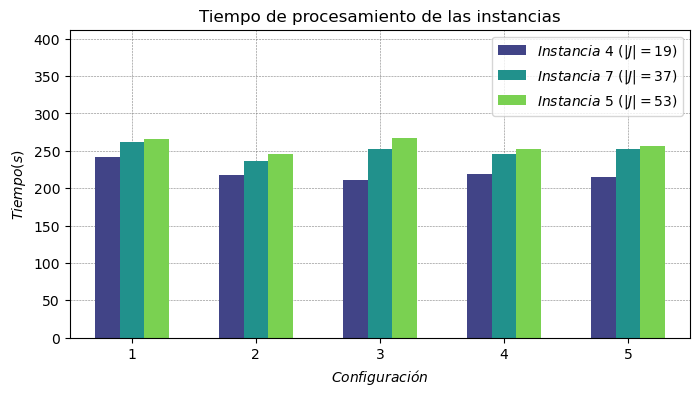

In [19]:
if plot_time:
    insts = ['4','7','5']
    tiempos = dict([i, []] for i in insts)
    num_confs = len(configuraciones)
    ind = np.arange(num_confs)
    
    for i in insts:
        with open('Results/testPerformance' + i+ '.pkl', 'rb') as f:
            testPerformance = pickle.load(f) 
            tiempos[i] = [testPerformance[i]['time'] for i in range(len(testPerformance))]
            f.close()


    
    fig, ax = plt.subplots(figsize=(8, 4))
    
    # Ancho de las barras
    ancho_barra = 1
    esp = 0.15 # Espacio entre barras

    # Dibujar las barras
    rects1 = ax.bar(2*ind + ind*3 - 0.5, np.mean(tiempos['4'],axis=1), ancho_barra, label='$Instancia\ 4\ (|J|=19)$', color=cmap(0.2), zorder = 2)
    rects2 = ax.bar(2*ind + ind*3 + 1 - 0.5, np.mean(tiempos['7'],axis=1), ancho_barra, label='$Instancia\ 7\ (|J|=37)$', color=cmap(0.5), zorder = 2)
    rects3 = ax.bar(2*ind + ind*3 + 2 - 0.5, np.mean(tiempos['5'],axis=1), ancho_barra, label='$Instancia\ 5\ (|J|=53)$', color=cmap(0.8), zorder = 2)

    # ax.plot([-10,100],[np.mean(promedio_info), np.mean(promedio_info)], color=cmap(0.2), linestyle='--', linewidth=1, zorder=2)
    # ax.plot([-10,100],[np.mean(promedio_procesos), np.mean(promedio_procesos)], color=cmap(0.5), linestyle='--', linewidth=1, zorder=2)

    # Configuración de ejes y etiquetas
    ax.set_xlabel('$Configuración$')
    ax.set_ylabel('$Tiempo (s)$')
    ax.set_title('Tiempo de procesamiento de las instancias')
    ax.set_xticks([i*2 + 3 * i + 0.5 for i in range(len(tiempos['5']))])
    ax.set_xticklabels([f'{i+1}' for i in range(len(tiempos['5']))])
    ax.set_xlim([-2, 2*(num_confs-1) + 3*(num_confs-1) +3])
    ax.set_ylim([0, 1.6*np.max([np.mean(tiempos['4']), np.mean(tiempos['7']), np.mean(tiempos['5'])])])

    # Leyenda para identificar los modelos
    ax.legend()
    ax.grid(True,zorder=0, color='gray', linestyle='--', linewidth=0.4)
    # Mostrar la gráfica
    fig.savefig('/home/cic/Tesis/Figuras/Results/tiemposOptimización.png', dpi=300)

In [25]:
insts = ['4','7','5']
medianas = dict([i, []] for i in insts)

for i in insts:
    with open('Results/testPerformance' + i+ '.pkl', 'rb') as f:
        testPerformance = pickle.load(f) 
        f.close()
    
    hipervolumenes = [testPerformance[i]['hv'] for i in range(len(testPerformance))]
    
    mediana = np.argsort(hipervolumenes, axis=1)
    mediana = mediana[:,len(mediana[0])//2]
    
    medianas[i] = mediana
    
    
instance = '4'
seed = mediana[instance][0]*308
parameters = ' -i ' + instance + ' --seed ' + str(seed) + ' ' + configuraciones[0]
hv, res = exec_algorithm(parameters, returnData=True, timeout=10)
    

# for i,p in enumerate(configuraciones):
#         for ejec in range(20):
#             seed = str(ejec*308)
            
#             # Extra whitespace around options is important!
#             parameters = ' -i ' + instance + ' --seed ' + seed + ' ' + p

#             ini = time.time()
#             hv, res = exec_algorithm(parameters, returnData=True, timeout=10)
#             fin = time.time()
            
#             testPerformance[i]['hv'].append(hv)
#             testPerformance[i]['res'].append(res)
#             testPerformance[i]['time'].append(fin - ini)
            
#             finish = ['ok','fail'][res == -1]
            
#             linea = str(i) + ' ' + str(ejec) + ' ' + str(hv) + ' ' + str(fin - ini) + ' ' + finish + '\n'
#             with open(output + '.txt', 'a') as file:
#                 file.write(linea)
                
#             with open(output+'.pkl', 'wb') as f:  
#                 pickle.dump(testPerformance, f)
#                 f.close()
            
#             print(linea)